In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xy_mat = np.array([0.0, 0.0])
orientation_alpha = np.pi * np.random.rand()
dxdy_mat = np.array([np.cos(orientation_alpha), np.sin(orientation_alpha)])
length_increment = 2.7
time_interval = 1e-3
total_time = 10.0
elongation_rate_constant = 11.0
loading_rate_constant = 10.0
dissociation_rate_constant = 3.0
actin_concentration = 1.0
elongation_rate = elongation_rate_constant * actin_concentration
loading_rate = loading_rate_constant
npf_density = 2000
npf_position_mat = 1000 * np.random.rand(npf_density, 2) - 500
is_npf_loaded_row = np.zeros(npf_density, dtype = bool)

In [3]:
diffusion_coefficient = 50
time = 0.0
from_solution = 0
from_surface = 0
while time < total_time:
    loading_rate_row = loading_rate * (is_npf_loaded_row == False)
    unloading_rate_row = dissociation_rate_constant * (is_npf_loaded_row == True)
    distance_row = np.sqrt(np.sum((npf_position_mat - xy_mat)**2, axis = 1))
    surface_elongation_rate_row = 4 * diffusion_coefficient / distance_row**2 * (is_npf_loaded_row == True)
    solution_elongation_rate_row = np.array([elongation_rate])
    transition_rate_row = np.hstack((loading_rate_row, unloading_rate_row, surface_elongation_rate_row, solution_elongation_rate_row))
    cumsum_transition_rate_row = np.cumsum(transition_rate_row)
    random_rate = np.random.rand() * cumsum_transition_rate_row[-1]
    rate_index = np.searchsorted(cumsum_transition_rate_row, random_rate)
    quotient, remainder = np.divmod(rate_index, npf_density)
    if quotient == 0:
        is_npf_loaded_row[remainder] = True
    elif quotient == 1:
        is_npf_loaded_row[remainder] = False
    elif quotient == 2:
        is_npf_loaded_row[remainder] = False
        xy_mat += length_increment * dxdy_mat
        from_surface += 1
    elif quotient == 3:
        xy_mat += length_increment * dxdy_mat
        from_solution += 1
    random_number = np.random.rand()
    time_increment = np.log(1 / random_number) / cumsum_transition_rate_row[-1]
    time += time_increment
    if xy_mat[0] > 500.0:
        xy_mat[0] -= 1000.0
    if xy_mat[0] < -500.0:
        xy_mat[0] += 1000.0
    if xy_mat[1] > 500.0:
        xy_mat[1] -= 1000.0
    if xy_mat[1] < -500.0:
        xy_mat[1] += 1000.0

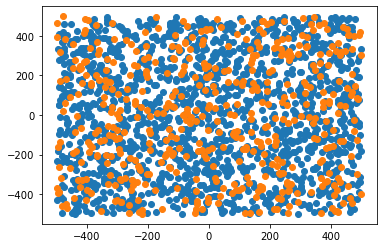

In [4]:
plt.scatter(npf_position_mat[:, 0][is_npf_loaded_row], npf_position_mat[:, 1][is_npf_loaded_row])
plt.scatter(npf_position_mat[:, 0][~is_npf_loaded_row], npf_position_mat[:, 1][~is_npf_loaded_row])

In [5]:
print((from_solution + from_surface) * 2.7e-3 * 6)

2.673
